In [37]:
# Pacotes
#import requests
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt
#import nltk
#from nltk.corpus import stopwords
#import string
#from wordcloud import WordCloud
#from collections import Counter
import spacy

In [3]:
# Chave de API do TMDb
api_key = "" # Insira a chave da API criada no TMDb

# URL para filmes do gênero Crime
url = f"https://api.themoviedb.org/3/discover/movie?api_key={api_key}&language=pt-BR&sort_by=vote_average.desc&with_genres=80&vote_count.gte=100"

In [5]:
# Requisição
response = requests.get(url)

# Verifica sucesso    
if response.status_code == 200:
    data = response.json()
    filmes = data.get("results", [])

    # Cria o dataframe
    df_filmes = pd.DataFrame(filmes, columns=['title', 'vote_average', 'vote_count', 'release_date', 'overview'])
    print(df_filmes.head(10))
else:
    print(f'Erro de requisição: {response.status_code}')

                              title  vote_average  vote_count release_date  \
0        As Três Mortes de Marisela         8.800         231   2020-10-14   
1             Um Sonho de Liberdade         8.708       28039   1994-09-23   
2                 O Poderoso Chefão         8.686       21257   1972-03-14   
3       O Poderoso Chefão: Parte II         8.568       12843   1974-12-20   
4    Batman: O Cavaleiro das Trevas         8.519       33644   2008-07-16   
5            À Espera de um Milagre         8.500       17968   1999-12-10   
6  Pulp Fiction: Tempo de Violência         8.489       28507   1994-09-10   
7              Os Bons Companheiros         8.500       13237   1990-09-12   
8                    Cidade de Deus         8.428        7575   2002-08-30   
9            Era Uma Vez na América         8.400        5554   1984-05-23   

                                            overview  
0  Este documentário acompanha a jornada incansáv...  
1  Em 1946, Andy Dufresne, um b

In [7]:
df_filmes

,title,vote_average,vote_count,release_date,overview
0,As Três Mortes de Marisela,8.800,231,2020-10-14,Este documentário acompanha a jornada incansáv...
1,Um Sonho de Liberdade,8.708,28039,1994-09-23,"Em 1946, Andy Dufresne, um banqueiro jovem e b..."
2,O Poderoso Chefão,8.686,21257,1972-03-14,"Em 1945, Don Corleone é o chefe de uma mafiosa..."
3,O Poderoso Chefão: Parte II,8.568,12843,1974-12-20,"Após a máfia matar sua família, o jovem Vito f..."
4,Batman: O Cavaleiro das Trevas,8.519,33644,2008-07-16,"Após dois anos desde o surgimento do Batman, o..."
5,À Espera de um Milagre,8.500,17968,1999-12-10,"Milagres acontecem em lugares inesperados, mes..."
6,Pulp Fiction: Tempo de Violência,8.489,28507,1994-09-10,Vincent Vega e Jules Winnfield são dois assass...
7,Os Bons Companheiros,8.500,13237,1990-09-12,"A história real de Henry Hill, um garoto meio ..."
8,Cidade de Deus,8.428,7575,2002-08-30,Buscapé é um jovem morador da Cidade de Deus q...
9,Era Uma Vez na América,8.400,5554,1984-05-23,Depois de crescer no gueto judeu de Nova Iorqu...


In [8]:
# Salvar os dados
df_filmes.to_csv("dados_filmes.csv", index=False, encoding='utf-8-sig')

In [55]:
# Carregar os dados
df_filmes = pd.read_csv('dados_filmes.csv')

## Análise Exploratória

In [60]:
df_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         20 non-null     object        
 1   vote_average  20 non-null     float64       
 2   vote_count    20 non-null     int64         
 3   release_date  20 non-null     datetime64[ns]
 4   overview      19 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 932.0+ bytes


In [57]:
df_filmes.describe()

,vote_average,vote_count
count,20.000000,20.000000
mean,8.420900,12471.450000
std,0.175697,10470.982784
min,8.188000,231.000000
25%,8.300000,1334.250000
50%,8.400000,12970.500000
75%,8.504750,18790.250000
max,8.800000,33644.000000


In [58]:
df_filmes.isnull().sum()

title           0
vote_average    0
vote_count      0
release_date    0
overview        1
dtype: int64

In [59]:
# Converter para o tipo Data
df_filmes['release_date'] = pd.to_datetime(df_filmes['release_date'], errors='coerce')

C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


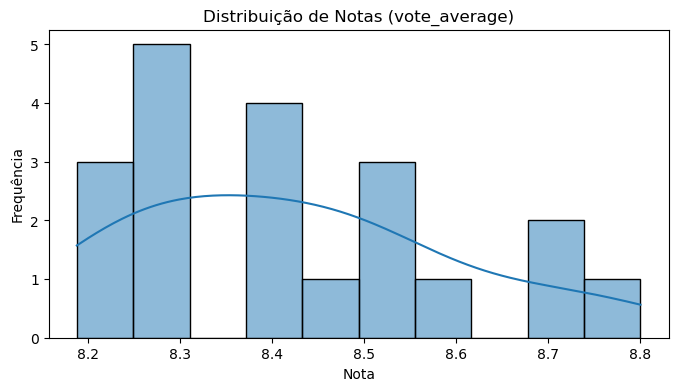

In [10]:
# Histograma Distribuição de notas
plt.figure(figsize=(8, 4))
sns.histplot(df_filmes['vote_average'], bins=10, kde=True)
plt.title('Distribuição de Notas (vote_average)')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

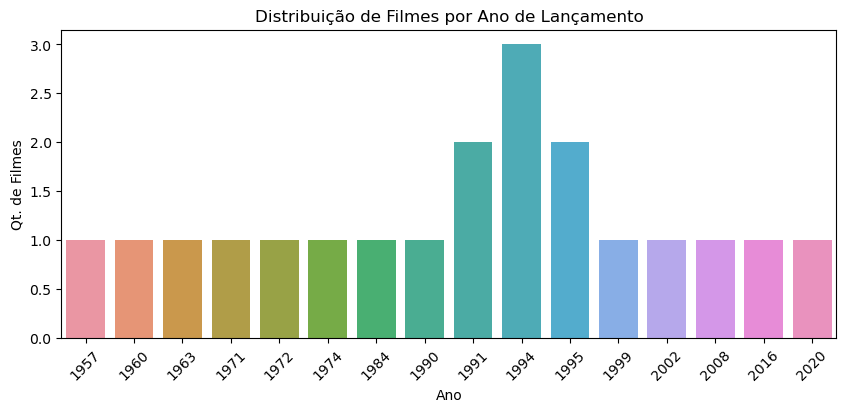

In [13]:
# Gráfico Distribuição por ano de lançamento
df_filmes['release_year'] = df_filmes['release_date'].dt.year # extrai o ano

plt.figure(figsize=(10, 4))
sns.countplot(data=df_filmes, x='release_year', order=sorted(df_filmes['release_year'].dropna().unique()))
plt.xticks(rotation=45)
plt.title('Distribuição de Filmes por Ano de Lançamento')
plt.xlabel('Ano')
plt.ylabel('Qt. de Filmes')
plt.show()

## Processamento de Linguagem Natural
### Usaremos PLN na coluna 'overview' para analisar a sinopse dos filmes

In [20]:
# Baixar stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
# Concatenar as sinopses
texto = ' '.join(df_filmes['overview'].dropna())

In [64]:
texto

'este documentário acompanha a jornada incansável de uma mãe para capturar o assassino da filha e expõe as falhas do sistema judiciário do méxico. em 1946, andy dufresne, um banqueiro jovem e bem sucedido, tem a sua vida radicalmente modificada ao ser condenado por um crime que nunca cometeu, o homicídio de sua esposa e do amante dela. ele é mandado para uma prisão que é o pesadelo de qualquer detento, a penitenciária estadual de shawshank, no maine. lá ele irá cumprir a pena perpétua. andy logo será apresentado a warden norton, o corrupto e cruel agente penitenciário, que usa a bíblia como arma de controle e ao capitão byron hadley que trata os internos como animais. andy faz amizade com ellis boyd redding, um prisioneiro que cumpre pena há 20 anos e controla o mercado negro da instituição. em 1945, don corleone é o chefe de uma mafiosa família italiana de nova york. ele costuma apadrinhar várias pessoas, realizando importantes favores para elas, em troca de favores futuros. com a che

In [63]:
# Texto em minúsculas
texto = texto.lower()

In [65]:
# Texto sem pontuação
texto = texto.translate(str.maketrans('', '', string.punctuation))

In [66]:
# Tokenize
tokens = nltk.word_tokenize(texto)

In [67]:
tokens

['este',
 'documentário',
 'acompanha',
 'a',
 'jornada',
 'incansável',
 'de',
 'uma',
 'mãe',
 'para',
 'capturar',
 'o',
 'assassino',
 'da',
 'filha',
 'e',
 'expõe',
 'as',
 'falhas',
 'do',
 'sistema',
 'judiciário',
 'do',
 'méxico',
 'em',
 '1946',
 'andy',
 'dufresne',
 'um',
 'banqueiro',
 'jovem',
 'e',
 'bem',
 'sucedido',
 'tem',
 'a',
 'sua',
 'vida',
 'radicalmente',
 'modificada',
 'ao',
 'ser',
 'condenado',
 'por',
 'um',
 'crime',
 'que',
 'nunca',
 'cometeu',
 'o',
 'homicídio',
 'de',
 'sua',
 'esposa',
 'e',
 'do',
 'amante',
 'dela',
 'ele',
 'é',
 'mandado',
 'para',
 'uma',
 'prisão',
 'que',
 'é',
 'o',
 'pesadelo',
 'de',
 'qualquer',
 'detento',
 'a',
 'penitenciária',
 'estadual',
 'de',
 'shawshank',
 'no',
 'maine',
 'lá',
 'ele',
 'irá',
 'cumprir',
 'a',
 'pena',
 'perpétua',
 'andy',
 'logo',
 'será',
 'apresentado',
 'a',
 'warden',
 'norton',
 'o',
 'corrupto',
 'e',
 'cruel',
 'agente',
 'penitenciário',
 'que',
 'usa',
 'a',
 'bíblia',
 'como',
 'a

In [68]:
# Remover Stopwords - português
stop_words = set(stopwords.words('portuguese'))

In [69]:
stop_words

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houverí

In [70]:
# Filtrar tokens
tokens_final = [word for word in tokens if word not in stop_words and word.isalpha()]

In [71]:
# Concatenar texto filtrado
texto_limpo = ' '.join(tokens_final)

In [72]:
texto_limpo

'documentário acompanha jornada incansável mãe capturar assassino filha expõe falhas sistema judiciário méxico andy dufresne banqueiro jovem bem sucedido vida radicalmente modificada condenado crime nunca cometeu homicídio esposa amante mandado prisão pesadelo qualquer detento penitenciária estadual shawshank maine lá irá cumprir pena perpétua andy logo apresentado warden norton corrupto cruel agente penitenciário usa bíblia arma controle capitão byron hadley trata internos animais andy faz amizade ellis boyd redding prisioneiro cumpre pena anos controla mercado negro instituição don corleone chefe mafiosa família italiana nova york costuma apadrinhar várias pessoas realizando importantes favores troca favores futuros chegada drogas famílias começam disputa promissor mercado corleone recusa facilitar entrada narcóticos cidade oferecendo ajuda política policial família começa sofrer atentados mudem posição nessa complicada época michael herói guerra nunca envolvido negócios família vê n

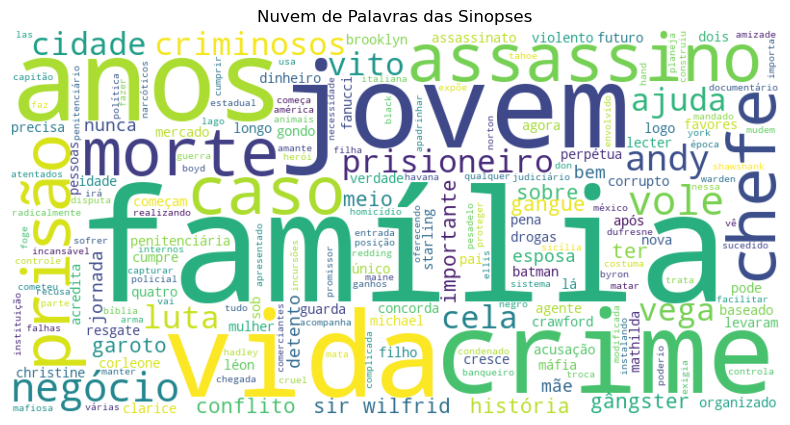

In [73]:
# Nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_limpo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras das Sinopses')
plt.show()

In [74]:
# Listar as 10 palavras mais frequentes
freq = Counter(tokens_final)
freq.most_common(10)

[('família', 9),
 ('jovem', 5),
 ('vida', 5),
 ('crime', 5),
 ('anos', 5),
 ('prisão', 4),
 ('vole', 4),
 ('assassino', 3),
 ('andy', 3),
 ('prisioneiro', 3)]

### Lematização

In [39]:
!python -m spacy download pt_core_news_sm

     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     ---------------------------------------- 0.1/13.0 MB 2.6 MB/s eta 0:00:05
     - -------------------------------------- 0.3/13.0 MB 4.1 MB/s eta 0:00:04
     -- ------------------------------------- 0.8/13.0 MB 5.4 MB/s eta 0:00:03
     ---- ----------------------------------- 1.3/13.0 MB 7.6 MB/s eta 0:00:02
     ----- ---------------------------------- 1.6/13.0 MB 8.1 MB/s eta 0:00:02
     ----- ---------------------------------- 1.6/13.0 MB 8.1 MB/s eta 0:00:02
     ------- -------------------------------- 2.5/13.0 MB 7.9 MB/s eta 0:00:02
     ---------- ----------------------------- 3.3/13.0 MB 9.2 MB/s eta 0:00:02
     ----------- ---------------------------- 3.9/13.0 MB 9.5 MB/s eta 0:00:01
     ------------ --------------------------- 4.2/13.0 MB 9.5 MB/s eta 0:00:01
     ------------ --------------------------- 4.2/13.0 MB 8.3 MB/s eta 0:00:02
     ---------------- ----------------------- 5.5/13.0 MB 1

In [75]:
# Carregar modelo português
nlp = spacy.load('pt_core_news_sm')

In [76]:
# Lematizar tokens
doc = nlp(' '.join(tokens_final))
tokens_lemat = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

In [77]:
# Exibir
tokens_lemat[:20]

['documentário',
 'acompanhar',
 'jornada',
 'incansável',
 'mãe',
 'capturar',
 'assassino',
 'filha',
 'expor',
 'falho',
 'judiciário',
 'méxico',
 'andy',
 'dufresne',
 'banqueiro',
 'jovem',
 'sucedido',
 'vida',
 'radicalmente',
 'modificar']

In [78]:
# Concatenar os lemas
texto_lemat = ' '.join(tokens_lemat)

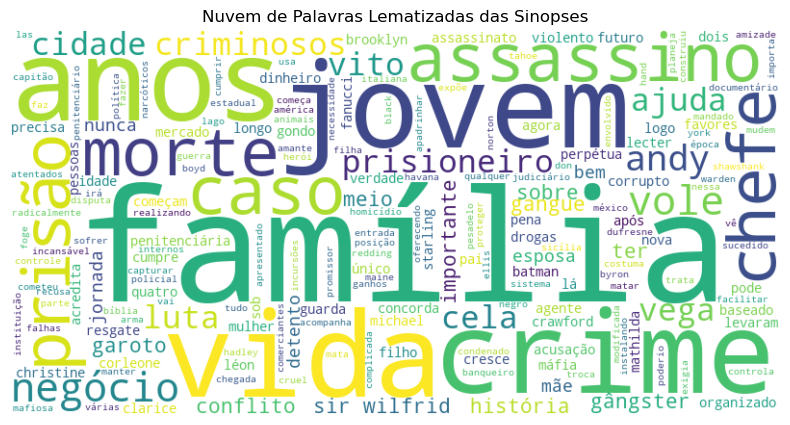

In [79]:
# Nuvem de palavras com lematização
wordcloud2 = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='cool'
).generate(texto_lemat)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras Lematizadas das Sinopses')
plt.show()

In [80]:
# Listar as 10 palavras lematizadas mais frequentes
freq = Counter(tokens_lemat)
freq.most_common(10)

[('família', 10),
 ('jovem', 6),
 ('vida', 5),
 ('crime', 5),
 ('ano', 5),
 ('assassino', 4),
 ('prisão', 4),
 ('chefe', 4),
 ('negócio', 4),
 ('morte', 4)]

## Fim